In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
# Linux
# !pip install underthesea --python=python3.11
!pip install underthesea
!pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.3 MB/s eta 0:00:00


In [19]:
from underthesea import word_tokenize

import numpy as np
import pandas as pd

from transformers import AutoModel, AutoTokenizer

import matplotlib.pyplot as plt
import re

# **Gộp thể loại**

In [ ]:
# df = pd.read_csv('../data/cleaned_data.csv')
df = pd.read_csv('/content/drive/MyDrive/data/cleaned_data.csv')
df.head()

,URL,Title,Abstract,Content,Category,num_words
0,https://vnexpress.net/biet-thu-lien-ke-duoi-5-...,biệt thự liền kề dưới 5 tỷ sẽ dần khan hiếm b...,tp hcm hai năm tới thành phố có thể không còn ...,trong báo cáo thị trường mới đây hãng tư vấn d...,bất động sản,600
1,https://tuoitre.vn/nha-dau-tu-hai-long-khi-tai...,nhà đầu tư hài lòng khi tài sản cho thuê được ...,trở về từ chuyến khảo sát phú quốc chị thu tra...,nắm bắt cơ hội đầu tư hơn 2 năm nay tôi đầu tư...,bất động sản,755
2,https://tuoitre.vn/tinh-nghe-an-noi-gi-ve-du-a...,tỉnh nghệ an nói gì về dự án công viên nghĩa t...,tto đây là công viên nghĩa trang sinh thái vĩ...,ngày 3112 ubnd tỉnh nghệ an có thông tin tới c...,bất động sản,507
3,https://tuoitre.vn/hang-xom-chung-cu-lexington...,hàng xóm chung cư lexington cũng chưa có sổ vì...,cư dân ở chung cư petrovietnam landmark tp thủ...,theo tìm hiểu củatuổi trẻ online dự án đường l...,bất động sản,673
4,https://tuoitre.vn/uc-doi-mat-cuoc-khung-hoang...,úc đối mặt cuộc khủng hoảng nhà cho thuê tồi t...,giá cho thuê nhà tăng mạnh đã và đang ảnh hưởn...,theo phóng viên ttxvn tại sydney báo cáo về kh...,bất động sản,559


# **Phân đoạn văn bản**

In [21]:
cols = ['Title', 'Abstract', 'Content']
df[cols] = df[cols].astype(str)

In [ ]:
def segmented_text(text):
    return word_tokenize(text, format="text")

df[cols] = df[cols].apply(lambda col: col.apply(segmented_text))
df.sample(5)

,URL,Title,Abstract,Content,Category,num_words
98781,https://thanhnien.vn/ket-qua-xo-so-kqxs-truc-t...,kết_quả xổ_số kqxs trực_tiếp nhanh hôm_nay thứ...,xem kết_quả xổ_số kqxs miền bắc xsmb kết_quả x...,giải bảy giải sáu giải năm giải tư_giải ba giả...,đời sống,42
44252,https://thanhnien.vn/bien-doi-khi-hau-co-the-g...,biến_đổi khí_hậu có_thể gây thiệt_hại 12 sản_l...,tno ngân_hàng thế_giới wb tại việt_nam hôm_nay...,báo_cáo phân_tích những rủi_ro thời_tiết nguy_...,kinh tế,368
21000,https://thanhnien.vn/kim-tuyen-doan-minh-tai-l...,kim tuyến đoàn minh_tài làm giám_khảo cuộc thi...,kim tuyến và đoàn minh_tài cảm_thấy cuộc thi l...,media24h là cuộc thi thử_thách các nhà làm trẻ...,giải trí,278
97510,https://dulich.tuoitre.vn/80-khach-du-lich-bay...,80 khách du_lịch bay thẳng từ ấn_độ đến phú_quốc,tto sáng 99 ông bùi_quốc_thái giám_đốc sở du_l...,theo ông thái kể từ dịch_bệnh covid19 đây là đ...,đời sống,200
12587,https://vnexpress.net/de-xuat-khong-cong-bo-di...,đề_xuất không công_bố điểm chuẩn xét_tuyển sớm...,để học_sinh không lơ_là học_tập trường đại_học...,ông huỳnh_văn_chương cục trưởng quản_lý chất_l...,giáo dục,507


In [ ]:
df = df.drop('num_words', axis=1)
df.to_csv('/content/drive/MyDrive/data/segmented_data.csv', index=False, encoding='utf-8')
# df.to_csv('../data/segmented_data.csv', index=False, encoding='utf-8')

In [16]:
df = pd.read_csv('/content/drive/MyDrive/data/segmented_data.csv')
df.sample(5)

,URL,Title,Abstract,Content,Category
27677,https://tuoitre.vn/cung-cap-kien-thuc-so-huu-t...,cung_cấp kiến_thức sở_hữu_trí_tuệ cho startup trẻ,tto các nhà_khởi_nghiệp trẻ tại đà_nẵng được c...,ngày 1410 tại vườn_ươm doanh_nghiệp đà_nẵng hơ...,giới trẻ
84482,https://thanhnien.vn/cuu-thu-hoa-giai-18514224...,cừu_thù hòa giải,với việc để cho các nhà ngoại_giao iran trở_lạ...,hai nước này trở_thành cừu_thù của nhau kể từ ...,xe
36215,https://thanhnien.vn/thien-than-truyen-trai-ng...,thiên_thần truyện trải_nghiệm nhân_vật thích k...,game thủ_thiên_thần_truyện đã có_thể trải_nghi...,tiềm_năng của thích khách công_thủ bạo_kích bạ...,khoa học
39433,https://thanhnien.vn/nph-lien-minh-huyen-thoai...,nph liên_minh huyền_thoại trêu game_thủ bằng t...,sau liên_minh huyền_thoại fifa online 3 và chi...,sáng ngày 11122015 vietnam esports tiền_thân l...,khoa học
1725,https://tuoitre.vn/the-aston-nha-trang-dang-ca...,the aston nha_trang đẳng_cấp sống của giới thư...,tại the_aston cuộc_sống mỗi ngày là chuỗi hành...,sống khỏe giữa biển trời trong xanh theo báo_c...,bất động sản


In [22]:
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base-v2")

tokenized_df = df.copy()
for col in ['Title', 'Abstract', 'Content']:
    tokenized_df[col] = tokenized_df[col].apply(lambda text: tokenizer.tokenize(text))

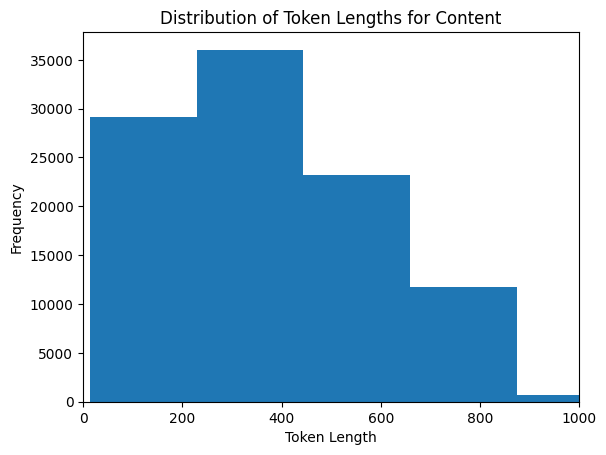

In [ ]:
token_lengths = np.vectorize(len)(tokenized_df['Content'].values)
plt.hist(token_lengths, bins=10)

plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Distribution of Token Lengths for Content')

plt.xlim(0, 1000)

plt.show()

In [23]:
tokenizer.save_pretrained("/content/drive/MyDrive/data/tokenizer/")

('/content/drive/MyDrive/data/tokenizer/tokenizer_config.json',
 '/content/drive/MyDrive/data/tokenizer/special_tokens_map.json',
 '/content/drive/MyDrive/data/tokenizer/vocab.txt',
 '/content/drive/MyDrive/data/tokenizer/bpe.codes',
 '/content/drive/MyDrive/data/tokenizer/added_tokens.json')